In [2]:
import pandas as pd 
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
import seaborn as sns
import scipy.stats as stats

In [3]:
from sklearn.model_selection import train_test_split
# 분류 기법
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, f1_score, roc_curve, auc

### 데이터 사전 다운로드

In [5]:
from tensorflow.keras.datasets import mnist

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


X_train_shape:  (60000, 28, 28)
Y_train_shape:  (60000,)
X_test_shape:  (10000, 28, 28)
Y_test_shape:  (10000,)


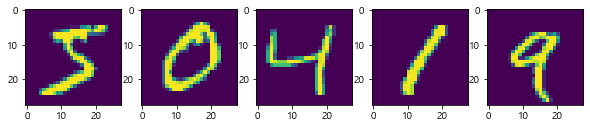

In [9]:

# 데이터 형태
print('X_train_shape: ', x_train.shape)
print('Y_train_shape: ', y_train.shape)

print('X_test_shape: ', x_test.shape)
print('Y_test_shape: ', y_test.shape)

# 데이터 표시
plt.figure(figsize = (10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i].reshape(28, 28))
    
plt.show()

In [13]:
# 정규화 및 차원 축소

x_train = x_train / 255.0
x_test = x_test / 255

input_shape = x_train.shape[1]*x_train.shape[2] # 이때, x_train.shape = (60000, 28, 28)

x_train = x_train.reshape(-1, input_shape)
x_test = x_test.reshape(-1, input_shape)

print('x_train_shape:', x_train.shape)
print('x_test_shape:', x_test.shape)

print('y_train_shape:', y_train.shape)
print('y_test_shape:', y_test.shape)

x_train_shape: (60000, 784)
x_test_shape: (10000, 784)
y_train_shape: (60000,)
y_test_shape: (10000,)


In [ ]:
# 데이터 저장하기
np.save('data/X_train', x_train)
np.save('data/X_test', x_test)
np.save('data/Y_train', y_train)
np.save('data/Y_test', y_test)

### 데이터 불러오기

In [4]:
x_train = np.load('data/X_train.npy')
x_test = np.load('data/X_test.npy')
y_train = np.load('data/Y_train.npy')
y_test = np.load('data/Y_test.npy')

print('x_train_shape:', x_train.shape)
print('x_test_shape:', x_test.shape)
print('y_train_shape:', y_train.shape)
print('y_test_shape:', y_test.shape)

x_train_shape: (60000, 784)
x_test_shape: (10000, 784)
y_train_shape: (60000,)
y_test_shape: (10000,)


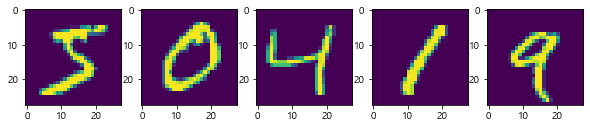

In [5]:
# 이미지 표시하기

x_train_image = x_train.reshape(60000, 28, 28)

plt.figure(figsize = (10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train_image[i].reshape(28, 28)) # 이미 28*28인데 reshape 또 해주는 이유?
plt.show()

### 로지스틱 회귀분석

In [6]:
log_reg = LogisticRegression(random_state=0)
log_reg.fit(x_train, y_train)

print('학습용 데이터의 정확도: ', log_reg.score(x_train, y_train))
print('평가용 데이터의 정확도: ', log_reg.score(x_test, y_test))

학습용 데이터의 정확도:  0.9350666666666667
평가용 데이터의 정확도:  0.9258


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
train_pred = log_reg.predict(x_train)
test_pred = log_reg.predict(x_test)
print('학습용 데이터의 혼동행렬:\n', confusion_matrix(y_train, train_pred))
print('평가용 데이터의 정확도:\n', confusion_matrix(y_test, test_pred))

학습용 데이터의 혼동행렬:
 [[5768    1   13    8   13   40   33    8   35    4]
 [   1 6581   29   19    6   26    3   13   54   10]
 [  25   50 5444   91   62   24   59   57  122   24]
 [  17   24  118 5558    7  184   16   48  116   43]
 [  11   24   24    9 5506    7   49   19   34  159]
 [  48   19   38  146   45 4883   75   18  112   37]
 [  27   13   38    1   35   65 5710    5   21    3]
 [   8   20   62   23   41   10    4 5917   16  164]
 [  26   96   56  130   24  134   37   17 5276   55]
 [  21   26   14   67  130   33    3  149   45 5461]]
평가용 데이터의 정확도:
 [[ 959    0    0    3    1    7    5    4    1    0]
 [   0 1111    4    2    0    2    3    2   11    0]
 [   6    9  926   16    9    4   13    6   39    4]
 [   4    1   18  917    1   22    4   11   25    7]
 [   1    1    7    3  914    0   10    4   10   32]
 [  10    2    3   34    7  783   14    6   29    4]
 [   9    3    8    2    7   14  912    2    1    0]
 [   1    8   24    5    7    1    0  950    3   29]
 [   9   11   

In [8]:
print('학습용 데이터 \n', classification_report(y_train, train_pred))
print('평가용 데이터 \n', classification_report(y_test, test_pred))

학습용 데이터 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      5923
           1       0.96      0.98      0.97      6742
           2       0.93      0.91      0.92      5958
           3       0.92      0.91      0.91      6131
           4       0.94      0.94      0.94      5842
           5       0.90      0.90      0.90      5421
           6       0.95      0.96      0.96      5918
           7       0.95      0.94      0.95      6265
           8       0.90      0.90      0.90      5851
           9       0.92      0.92      0.92      5949

    accuracy                           0.94     60000
   macro avg       0.93      0.93      0.93     60000
weighted avg       0.93      0.94      0.93     60000

평가용 데이터 
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
    

### 의사결정나무

In [24]:
tree_uncustomized = DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(x_train, y_train)

print('학습용 데이터의 정확도: ', tree_uncustomized.score(x_train, y_train))
print('평가용 데이터의 정확도: ', tree_uncustomized.score(x_test, y_test))

학습용 데이터의 정확도:  1.0
평가용 데이터의 정확도:  0.8772


###### depth 결정

In [22]:
dt_train_acc, dt_test_acc = [], []
dt_train_f1, dt_test_f1 = [], []

para_depth = list(range(9, 30))

for n in para_depth:
    dt = DecisionTreeClassifier(random_state=1234, max_depth=n)
    dt.fit(x_train, y_train)
    dt_train_acc.append(dt.score(x_train, y_train))
    dt_test_acc.append(dt.score(x_test, y_test))    
    
    train_pred = dt.predict(x_train)
    test_pred = dt.predict(x_test)
    dt_train_f1.append(f1_score(y_train, train_pred, average=None))
    dt_test_f1.append(f1_score(y_test, test_pred, average=None))    

# 결과 저장
dt_score_depth = pd.DataFrame()
dt_score_depth['MaxDepth'] = para_depth
dt_score_depth['TrainAcc'] = dt_train_acc
dt_score_depth['TestAcc'] = dt_test_acc
dt_score_depth['TrainF1'] = dt_train_f1
dt_score_depth['TestF1'] = dt_test_f1


dt_score_depth.round(3)

,MaxDepth,TrainAcc,TestAcc,TrainF1,TestF1
0,9,0.867,0.850,"[0.9301811378518582, 0.9421728971962617, 0.857...","[0.9164989939637826, 0.944636678200692, 0.841,..."
1,10,0.900,0.866,"[0.9436477138518644, 0.960053361002001, 0.9000...","[0.9209864116758933, 0.9530495831505046, 0.848..."
2,11,0.928,0.874,"[0.9613668883090649, 0.9665711556829036, 0.925...","[0.9254783484390735, 0.951718138321009, 0.8589..."
3,12,0.949,0.879,"[0.9770838579702846, 0.9782608695652174, 0.948...","[0.9342770475227503, 0.9591926283457657, 0.861..."
4,13,0.965,0.879,"[0.983804648821012, 0.9825259898252598, 0.9636...","[0.9247743229689067, 0.9597550306211724, 0.864..."
5,14,0.977,0.881,"[0.989978947368421, 0.9863033873343152, 0.9781...","[0.9254783484390735, 0.9585333915320821, 0.861..."
6,15,0.984,0.883,"[0.9915966386554621, 0.9910641754670998, 0.984...","[0.9303030303030304, 0.9610843900306079, 0.867..."
7,16,0.988,0.881,"[0.9937001259974801, 0.992609016999261, 0.9884...","[0.9220713926596279, 0.9614035087719298, 0.862..."
8,17,0.991,0.879,"[0.9952072647776004, 0.9940837154267119, 0.991...","[0.9288956127080182, 0.9600351339481774, 0.868..."
9,18,0.993,0.880,"[0.9960467659180756, 0.9946001923219172, 0.993...","[0.9198184568835098, 0.9567118495846086, 0.863..."


In [39]:
for i in range(21):
    print(i, dt_score_depth['TestF1'][i].mean())

0 0.8481829868184491
1 0.8640644118292193
2 0.8721766023186269
3 0.8771319085463407
4 0.8775504911741304
5 0.8793839195887188
6 0.8812172193137597
7 0.8794004270946016
8 0.8775050198115858
9 0.8787627001277356
10 0.8785535047073114
11 0.8806003381893841
12 0.8774694086453547
13 0.8785172303340971
14 0.8784708136835931
15 0.8773373995330251
16 0.8778054894865901
17 0.8755781514083946
18 0.8781138069677672
19 0.8803981311828141
20 0.876154143739414


0.8640644118292193

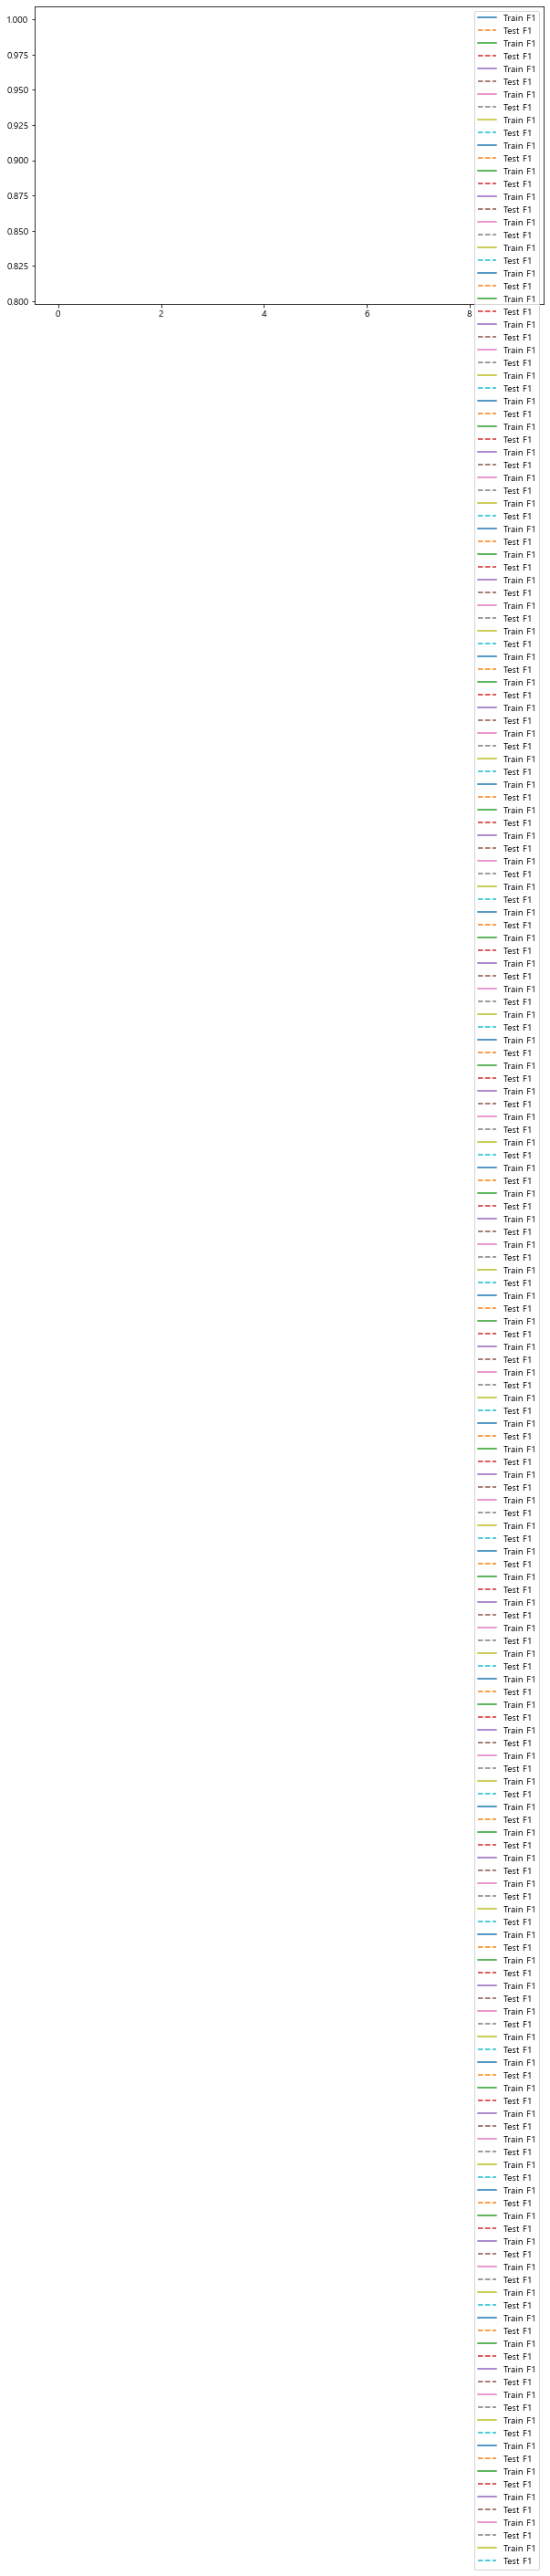

In [34]:
# 모델 설명력 그래프 확인
number = list(range(0, 10))
count = list(range(11, 21))
colors = ['red', 'blue', 'green', 'gray', 'black', 'pink', 'yellow', 'cyan', 'lime', 'plum', 'olive']
plt.figure(figsize = (10, 6))
c = 0
for i in count:
    for j in number:
        plt.plot(j, dt_train_f1[i][j], linestyle = '-', label = 'Train F1')
        plt.plot(j, dt_test_f1[i][j], linestyle = '--', label = 'Test F1')
        
plt.legend()

In [44]:
# 최종 모델 결정, max depth = 6
dt_final = DecisionTreeClassifier(random_state = 1234, max_depth = 6)
dt_final.fit(x_train, y_train)
dt_train_pred = dt_final.predict(x_train)
dt_test_pred = dt_final.predict(x_test)


print('학습용 데이터 Accuracy: ', dt_final.score(x_train, y_train))
print('학습용 데이터 Accuracy: ', dt_final.score(x_test, y_test))
print('학습용 데이터 F1 score: ', f1_score(y_train, dt_train_pred, average = None).mean())
print('평가용 데이터 F1 score: ', f1_score(y_test, dt_test_pred, average = None).mean())

print('\n학습용 데이터 혼동행렬: \n', confusion_matrix(y_train, dt_train_pred))
print('평가용 데이터 혼동행렬: \n', confusion_matrix(y_test, dt_test_pred))

print('\n학습용 데이터\n', classification_report(y_train, dt_train_pred))
print('평가용 데이터\n', classification_report(y_test, dt_test_pred))




학습용 데이터 Accuracy:  0.73825
학습용 데이터 Accuracy:  0.7415
학습용 데이터 F1 score:  0.7361239721923478
평가용 데이터 F1 score:  0.738910829415407

학습용 데이터 혼동행렬: 
 [[4547    2   61  215  354  206  109   92  211  126]
 [   4 5936  230   70    6   68  167   51  205    5]
 [ 112  241 4330   51  230  248  269   83  244  150]
 [  73   76  316 4232  224  450  118   62  195  385]
 [  20   20    9   79 4425  216  189  183  131  570]
 [ 137   74   67  757  490 3122  239  203  182  150]
 [  88  137   61   42  789  282 4209   39  200   71]
 [   9  172  201   65  111   77   25 4939  170  496]
 [  22  181  102  225  401  309  294   22 3999  296]
 [  23   83   15  204  273  238  138  232  187 4556]]
평가용 데이터 혼동행렬: 
 [[786   0  11  21  64  27   8  19  22  22]
 [  1 996  40  20   0   6  28   6  38   0]
 [ 16  61 725   8  39  40  54  19  51  19]
 [ 13  13  60 734  29  71  13   6  26  45]
 [  3   7   2  11 733  33  40  23  32  98]
 [ 21  12  14 122  78 514  34  49  29  19]
 [ 22  19   6   6 146  45 673   3  25  13]
 [  2  

### 랜덤포레스트

In [45]:
rf_uncustomized = RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(x_train, y_train)

print('학습용 데이터의 정확도: ', rf_uncustomized.score(x_train, y_train))
print('평가용 데이터의 정확도: ', rf_uncustomized.score(x_test, y_test))

학습용 데이터의 정확도:  1.0
평가용 데이터의 정확도:  0.9712


###### depth 결정

In [46]:
rf_train_acc, rf_test_acc = [], []
rf_train_f1, rf_test_f1 = [], []

para_depth = list(range(5, 21))

for n in para_depth:
    rf = RandomForestClassifier(random_state=1234, max_depth=n)
    rf.fit(x_train, y_train)
    rf_train_acc.append(rf.score(x_train, y_train))
    rf_test_acc.append(rf.score(x_test, y_test))    
    
    train_pred = rf.predict(x_train)
    test_pred = rf.predict(x_test)
    rf_train_f1.append(f1_score(y_train, train_pred, average=None))
    rf_test_f1.append(f1_score(y_test, test_pred, average=None))    
    print(n)
    print(rf.get_params())

# 결과 저장
rf_score_depth = pd.DataFrame()
rf_score_depth['MaxDepth'] = para_depth
rf_score_depth['TrainAcc'] = rf_train_acc
rf_score_depth['TestAcc'] = rf_test_acc
rf_score_depth['TrainF1'] = rf_train_f1
rf_score_depth['TestF1'] = rf_test_f1


rf_score_depth.round(3)

5
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 1234, 'verbose': 0, 'warm_start': False}
6
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 1234, 'verbose': 0, 'warm_start': False}
7
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples'

,MaxDepth,TrainAcc,TestAcc,TrainF1,TestF1
0,5,0.855,0.860,"[0.93553963941714, 0.9010266940451745, 0.87040...","[0.9385365853658536, 0.9229494614747307, 0.881..."
1,6,0.892,0.895,"[0.9519599666388656, 0.9307686867972562, 0.894...","[0.9501726689689196, 0.9504273504273505, 0.896..."
2,7,0.914,0.914,"[0.9639624539054643, 0.9476949715027776, 0.917...","[0.9605591612581129, 0.9657860545690775, 0.918..."
3,8,0.933,0.929,"[0.973781512605042, 0.9605531295487627, 0.9362...","[0.9660000000000001, 0.9721496953872933, 0.930..."
4,9,0.949,0.938,"[0.9809988229359341, 0.9690873045010647, 0.949...","[0.9747983870967741, 0.9799126637554585, 0.937..."
5,10,0.964,0.948,"[0.9888720283257462, 0.9768194863492531, 0.965...","[0.9748490945674045, 0.9802890932982917, 0.940..."
6,11,0.977,0.953,"[0.9946813001266356, 0.9836234877544998, 0.978...","[0.9772612430520464, 0.9859525899912203, 0.947..."
7,12,0.986,0.959,"[0.9978059071729958, 0.9890742654658202, 0.987...","[0.9802731411229135, 0.984628897672376, 0.9545..."
8,13,0.992,0.962,"[0.9990716516161702, 0.9930555555555555, 0.994...","[0.9792615073343449, 0.986830553116769, 0.9570..."
9,14,0.995,0.964,"[0.999493670886076, 0.9957830879633055, 0.9968...","[0.9822784810126581, 0.9876977152899824, 0.963..."


In [48]:
for i in range(16):
    print(i, rf_score_depth['TestF1'][i].mean())

0 0.8564447271968728
1 0.8935373535494098
2 0.9132011782673665
3 0.9282946022618033
4 0.9376152790561418
5 0.9471255527875628
6 0.9528378398508437
7 0.9587419489049266
8 0.961767757136335
9 0.9641493853593894
10 0.9660620687784695
11 0.9678839335702122
12 0.9674718083743725
13 0.9675518998705872
14 0.968304129780041
15 0.9681418252061071


In [49]:
# 최종 모델 결정, max depth = 14
rf_final = RandomForestClassifier(random_state = 1234, max_depth = 14, n_estimators = 100)
rf_final.fit(x_train, y_train)
rf_train_pred = rf_final.predict(x_train)
rf_test_pred = rf_final.predict(x_test)


print('학습용 데이터 Accuracy: ', rf_final.score(x_train, y_train))
print('학습용 데이터 Accuracy: ', rf_final.score(x_test, y_test))

print('\n학습용 데이터 혼동행렬: \n', confusion_matrix(y_train, rf_train_pred))
print('평가용 데이터 혼동행렬: \n', confusion_matrix(y_test, rf_test_pred))

print('\n학습용 데이터\n', classification_report(y_train, rf_train_pred))
print('평가용 데이터\n', classification_report(y_test, rf_test_pred))


학습용 데이터 Accuracy:  0.9953666666666666
학습용 데이터 Accuracy:  0.9644

학습용 데이터 혼동행렬: 
 [[5922    0    0    0    1    0    0    0    0    0]
 [   0 6730    2    0    3    0    0    3    1    3]
 [   0    2 5934    0    2    0    0   15    3    2]
 [   0    2    6 6085    0    3    0   19    7    9]
 [   1    4    0    0 5797    0    3    2    0   35]
 [   1    3    0    1    2 5408    5    0    0    1]
 [   1    6    0    0    1    0 5910    0    0    0]
 [   0    7    3    0    2    0    0 6228    0   25]
 [   0   18    2    0    0    0    0    0 5812   19]
 [   2    3    0    5   16    1    0   25    1 5896]]
평가용 데이터 혼동행렬: 
 [[ 970    0    0    0    0    2    3    1    3    1]
 [   0 1124    3    3    0    1    3    0    1    0]
 [   4    0  998    6    4    0    4    8    7    1]
 [   0    0   10  964    0   13    0    9    9    5]
 [   1    0    1    0  944    0    7    0    3   26]
 [   3    2    0   16    3  854    5    2    5    2]
 [   6    3    1    0    4    4  938    0    2    0]
 

### 그래디언트 부스팅

In [53]:
gb_uncustomized = GradientBoostingClassifier(random_state = 1234, max_depth = 6)
gb_uncustomized.fit(x_train, y_train)

print('학습용 데이터의 정확도: ', gb_uncustomized.score(x_train, y_train))
print('평가용 데이터의 정확도: ', gb_uncustomized.score(x_test, y_test))

학습용 데이터의 정확도:  1.0
평가용 데이터의 정확도:  0.9693


###### Depth 결정

In [52]:
gb_train_acc, gb_test_acc = [], []
gb_train_f1, gb_test_f1 = [], []

para_depth = list(range(10, 21))

for n in para_depth:
    gb = GradientBoostingClassifier(random_state=1234, max_depth=n)
    gb.fit(x_train, y_train)
    gb_train_acc.append(gb.score(x_train, y_train))
    gb_test_acc.append(gb.score(x_test, y_test))    
    
    train_pred = gb.predict(x_train)
    test_pred = gb.predict(x_test)
    gb_train_f1.append(f1_score(y_train, train_pred, average=None))
    gb_test_f1.append(f1_score(y_test, test_pred, average=None))    
    print(n)
    print(gb.get_params())

# 결과 저장
gb_score_depth = pd.DataFrame()
gb_score_depth['MaxDepth'] = para_depth
gb_score_depth['TrainAcc'] = gb_train_acc
gb_score_depth['TestAcc'] = gb_test_acc
gb_score_depth['TrainF1'] = gb_train_f1
gb_score_depth['TestF1'] = gb_test_f1


gb_score_depth.round(3)

KeyboardInterrupt: 

In [ ]:
for i in range(21):
    print(i, gb_score_depth['TestF1'][i].mean())

In [ ]:
# 최종 모델 결정, max depth = 
gb_final = GradientBoostingClassifier(random_state = 1234, max_depth = )
gb_final.fit(x_train, y_train)
gb_train_pred = gb_final.predict(x_train)
gb_test_pred = gb_final.predict(x_test)


print('학습용 데이터 Accuracy: ', gb_final.score(x_train, y_train))
print('학습용 데이터 Accuracy: ', gb_final.score(x_test, y_test))

print('\n학습용 데이터 혼동행렬: \n', confusion_matrix(y_train, gb_train_pred))
print('평가용 데이터 혼동행렬: \n', confusion_matrix(y_test, gb_test_pred))

print('\n학습용 데이터\n', classification_report(y_train, gb_train_pred))
print('평가용 데이터\n', classification_report(y_test, gb_test_pred))


### XGBoost

In [ ]:
xgb_uncustomized = XGBClassifier(random_state = 1234)
xgb_uncustomized.fit(x_train, y_train)

print('학습용 데이터의 정확도: ', xgb_uncustomized.score(x_train, y_train))
print('평가용 데이터의 정확도: ', xgb_uncustomized.score(x_test, y_test))

train_pred = xgb_uncustomized.predict(x_train)
test_pred = xgb_uncustomized.predict(x_test)

print('\n학습용 데이터 혼동행렬: \n', confusion_matrix(y_train, train_pred))
print('평가용 데이터 혼동행렬: \n', confusion_matrix(y_test, test_pred))

print('\n학습용 데이터\n', classification_report(y_train, xgb_train_pred))
print('평가용 데이터\n', classification_report(y_test, xgb_test_pred))


###### Depth 결정

In [52]:
xgb_train_acc, xgb_test_acc = [], []
xgb_train_f1, xgb_test_f1 = [], []

para_depth = list(range(10, 21))

for n in para_depth:
    xgb = XGBClassifier(random_state=1234, max_depth=n)
    xgb.fit(x_train, y_train)
    xgb_train_acc.append(xgb.score(x_train, y_train))
    xgb_test_acc.append(xgb.score(x_test, y_test))    
    
    train_pred = xgb.predict(x_train)
    test_pred = xgb.predict(x_test)
    xgb_train_f1.append(f1_score(y_train, train_pred, average=None))
    xgb_test_f1.append(f1_score(y_test, test_pred, average=None))    
    print(n)
    print(xgb.get_params())

# 결과 저장
xgb_score_depth = pd.DataFrame()
xgb_score_depth['MaxDepth'] = para_depth
xgb_score_depth['TrainAcc'] = xgb_train_acc
xgb_score_depth['TestAcc'] = xgb_test_acc
xgb_score_depth['TrainF1'] = xgb_train_f1
xgb_score_depth['TestF1'] = xgb_test_f1


xgb_score_depth.round(3)

KeyboardInterrupt: 